## Quantitative LEIS analysis

This repository provides tools for quantitative Low-Energy Ion Scattering (LEIS) analysis. It includes modules for restoring spectra distorted by electrostatic energy separators and for quantifying LEIS spectra. The tools facilitate the analysis of energy spectra, enabling the identification and quantification of elements in a sample. This notebook is intended to show main features of this rep, which can be distinguished in two separate modules: lib for restoration of spectra after distortion due to electrostatic energy separators and the lib for LEIS spectra quantification.\

In the first example you can see the use of basic methods of LEIS lib, which allow to calculate some kinematics of elastic scattering, including angle of scattering, energy losses and identification of target masses by energy losses.


In [1]:
import os, sys
BASE_LIB_PATH = "tools"
sys.path.insert(1, os.getcwd()+os.sep+BASE_LIB_PATH)
import LEIS_tools as leis
import spectraConvDeconv_tools as SCD


incidentElement = "Ne"
E0 = 1500 # eV
scattering_angle = 145 # degrees
targetElement1 = "Au"
targetElement2 = "Pd"

Peak_position1 = leis.get_energy_by_angle( E0, leis.get_mass_by_element(targetElement1)/leis.get_mass_by_element(incidentElement), scattering_angle)/1000
print("The peak position for "+targetElement1+" is "+str(Peak_position1)[0:5]+" keV")
Peak_position2 = leis.get_energy_by_angle( E0, leis.get_mass_by_element(targetElement2)/leis.get_mass_by_element(incidentElement), scattering_angle)/1000
print("The peak position for "+targetElement2+" is "+str(Peak_position2)[0:5]+" keV")
calculated_mass1 = leis.get_target_mass_by_energy(scattering_angle, leis.get_mass_by_element(incidentElement),E0, Peak_position1*1000)
print("The energy losses of  "+str(E0-Peak_position1*1000)[0:4]+" eV corresponds to "+
      str(calculated_mass1)[0:3]+" a.m.u., which can be an "+leis.get_element_by_mass(calculated_mass1)+" element")


The peak position for Au is 1.031 keV
The peak position for Pd is 0.745 keV
The energy losses of  468. eV corresponds to 196 a.m.u., which can be an Au element


Now lets try to provide automated LEIS analysis of some energy spectra, preliminary simulated in SDTrimSP Monte-Carlo code

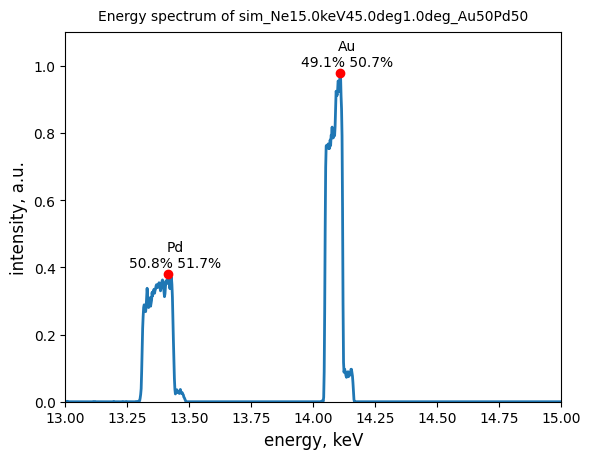

In [2]:
spectrum_path0 = os.getcwd()+os.sep+"raw_data"+os.sep

spectrum_path0 +="temp"+os.sep+"sim_Ne15.0keV45.0deg1.0deg_Au50Pd50.dat"

data = leis.spectrum(spectrum_path0, 10)
data.do_elemental_analysis()
leis.Emin = 13000
leis.Emax = 15000
leis.plot_spectrum_with_concs(data, title="Energy spectrum of "+data.calc_name)

## Quantitative analysis of experimental spectra

Now lets try to analyze real spectrum obtained in the Large mass-monochromator Mephi facility aka [Crocodile](https://github.com/mauveferret/croco)

ValueError: x and y must have same first dimension, but have shapes (4492,) and (1,)

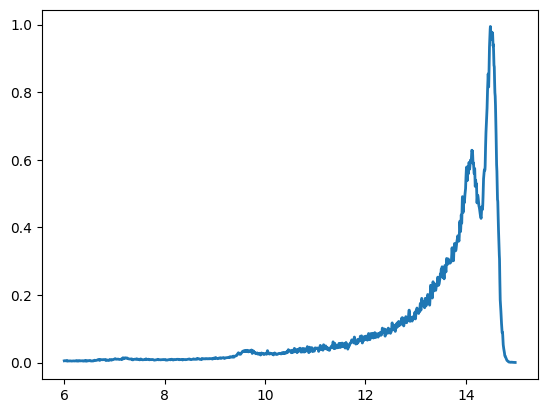

In [3]:
import matplotlib.pyplot as plt

spectrum_path0 = os.getcwd()+os.sep+"raw_data"+os.sep+"exp_AuPd"+os.sep
exp_spectra = os.listdir(spectrum_path0)

spectrum_path = next(path for path in exp_spectra if "15-07" in path)

Emin = 6000
Emax = 15000

data = leis.spectrum(spectrum_path0+spectrum_path, 20)

young_fitting = leis.fitted_spectrum(data, "Pd", "Au")


plt.plot(data.spectrum_en[int(Emin/data.step):]/1000, data.spectrum_int[int(Emin/data.step):], '-', linewidth=2, label=data.calc_name)
plt.plot(data.spectrum_en[int(Emin/data.step):]/1000, young_fitting.get_fitted_spectrum, '--', linewidth=2, color="red", label="Fitted spectrum") 

plt.xlabel('energy, keV', fontsize=12)
#plt.xlim (Emin/1000, Emax/1000)
plt.ylabel('intensity, a.u.', fontsize=12)
plt.ylim(0, 1.1)
plt.minorticks_on
plt.legend()
plt.show()
